### **Using Numpy**

In [107]:
import numpy as np

# Step 1: Define the two vectors (|ψ₁⟩ and |ψ₂⟩)
psi_1 = np.array([1, 0])  # |0⟩
psi_2 = np.array([0, 1])  # |1⟩

# Tensor product |ψ₁⟩ ⊗ |ψ₂⟩
psi_tensor = np.kron(psi_1, psi_2)
print("Tensor product of |ψ₁⟩ and |ψ₂⟩:")
print(psi_tensor)

Tensor product of |ψ₁⟩ and |ψ₂⟩:
[0 1 0 0]


In [108]:
# Step 2: Define the CNOT operator
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

In [109]:
# Step 3: Apply the CNOT operator on the tensor product state
new_state = np.dot(CNOT, psi_tensor)
print("\nState after applying CNOT operator:")
print(new_state)


State after applying CNOT operator:
[0 1 0 0]


In [110]:
# Step 4: Partial measurement of the first qubit
# Projection operator for measuring first qubit in |0⟩
P0 = np.array([[1, 0],
               [0, 0]])

In [111]:
# Extending this to a 4x4 matrix that acts on the full system
P0_full = np.kron(P0, np.eye(2))

In [112]:
# Apply the projection to get the post-measurement state
post_measurement_state = np.dot(P0_full, new_state)


In [113]:
# Normalize the post-measurement state
norm = np.linalg.norm(post_measurement_state)
if norm != 0:
    post_measurement_state /= norm

print("\nState after partial measurement (first qubit measured in |0⟩):")
print(post_measurement_state)


State after partial measurement (first qubit measured in |0⟩):
[0. 1. 0. 0.]


### **Using Qiskit**

In [114]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import Aer

In [115]:
# Step 1: Initialize the Quantum Circuit with 2 qubits
qc = QuantumCircuit(2)


In [116]:
# Step 2: Apply the CNOT gate
# CNOT gate: control = qubit 0, target = qubit 1
qc.cx(0,1)

# Visualize the circuit
print("Quantum Circuit:")
print(qc)

Quantum Circuit:
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


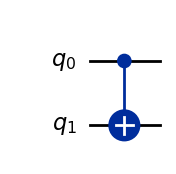

In [117]:
display(qc.draw("mpl"))

In [118]:
# Step 3: Measure the qubits
qc.measure_all()

In [119]:
# Simulate the circuit
backend = Aer.get_backend('statevector_simulator')
result = backend.run(qc).result()
statevector = result.get_statevector()
print(statevector)

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [120]:
# Define a custom operator (e.g., rotation operator Rz)
rz_operator = Operator([[1, 0], [0, np.exp(1j * np.pi / 4)]])

# Apply the operator to a single-qubit state
qc = QuantumCircuit(1)
qc.initialize([1, 0], 0)  # Initialize in |0>
qc.unitary(rz_operator, [0], label="Rz")  # Apply Rz

# Simulate the resulting state
state = Statevector.from_instruction(qc)
print("State after applying Rz operator:")
print(state)

# Perform partial measurement
qc.measure_all()
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()
print("Partial measurement result:")
print(counts)


State after applying Rz operator:
Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
Partial measurement result:
{'0': 1024}


In [121]:
from qiskit.quantum_info import Operator

# Define CSWAP gate
qc_cswap = QuantumCircuit(3)
qc_cswap.cswap(0, 1, 2)  # Control on qubit 0, swap qubits 1 and 2
cswap_operator = Operator(qc_cswap)

# Print the matrix representation
print("CSWAP Matrix Representation:")
print(cswap_operator.data)

# Dirac notation:
print("\nCSWAP Dirac Notation:")
print("|a, b, c⟩ → |a, c, b⟩ if a = 1; otherwise no swap")


CSWAP Matrix Representation:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

CSWAP Dirac Notation:
|a, b, c⟩ → |a, c, b⟩ if a = 1; otherwise no swap


In [122]:
# Define Toffoli gate
qc_toffoli = QuantumCircuit(3)
qc_toffoli.ccx(0, 1, 2)  # Control on qubits 0, 1, target on qubit 2
toffoli_operator = Operator(qc_toffoli)

# Print the matrix representation
print("Toffoli Matrix Representation:")
print(toffoli_operator.data)

# Dirac notation:
print("\nToffoli Dirac Notation:")
print("|a, b, c⟩ → |a, b, c ⊕ (a ⋅ b)⟩")


Toffoli Matrix Representation:
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

Toffoli Dirac Notation:
|a, b, c⟩ → |a, b, c ⊕ (a ⋅ b)⟩
